1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
# from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
import matplotlib.pyplot as plt
from numpy import where
from IPython.display import Image

In [109]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [110]:
df_default=pd.get_dummies(df['default'])
df_default=df_default.drop(['No'],1)
df_default.rename(columns={'Yes':'default'}, inplace=True)
df_student=pd.get_dummies(df['student'])
df_student=df_student.drop(['No'],1)
df_student.rename(columns={'Yes':'student'}, inplace=True)
df_final=pd.concat([df_default,df_student,df[['balance','income']]],axis=1)
df_final.shape
df_final.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

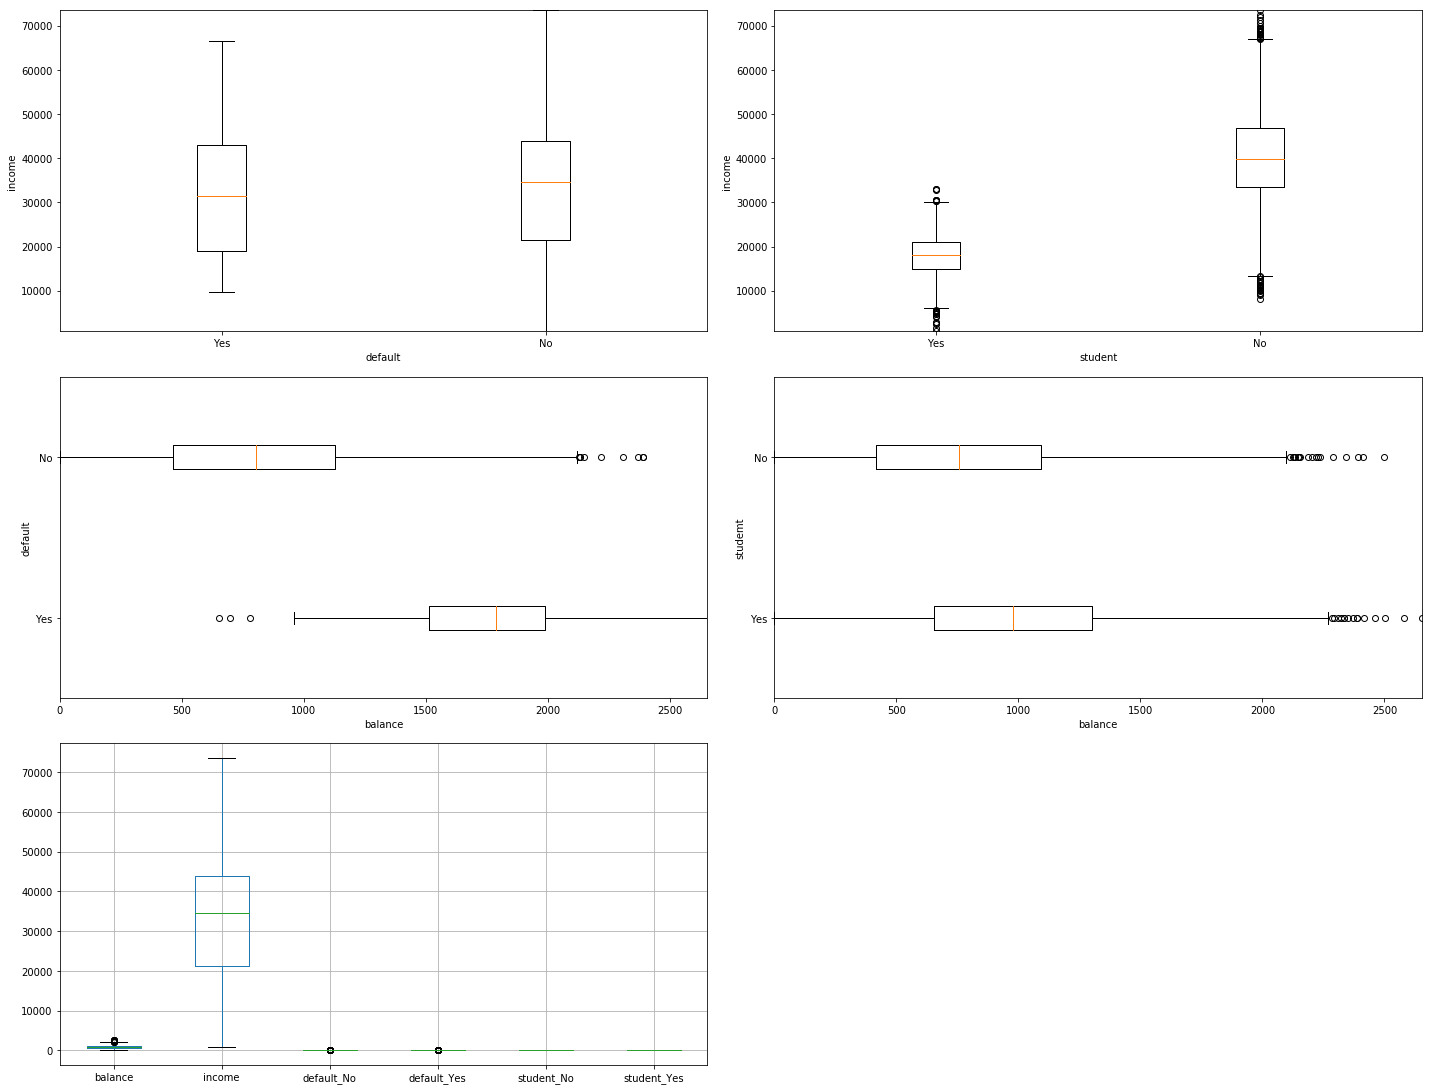

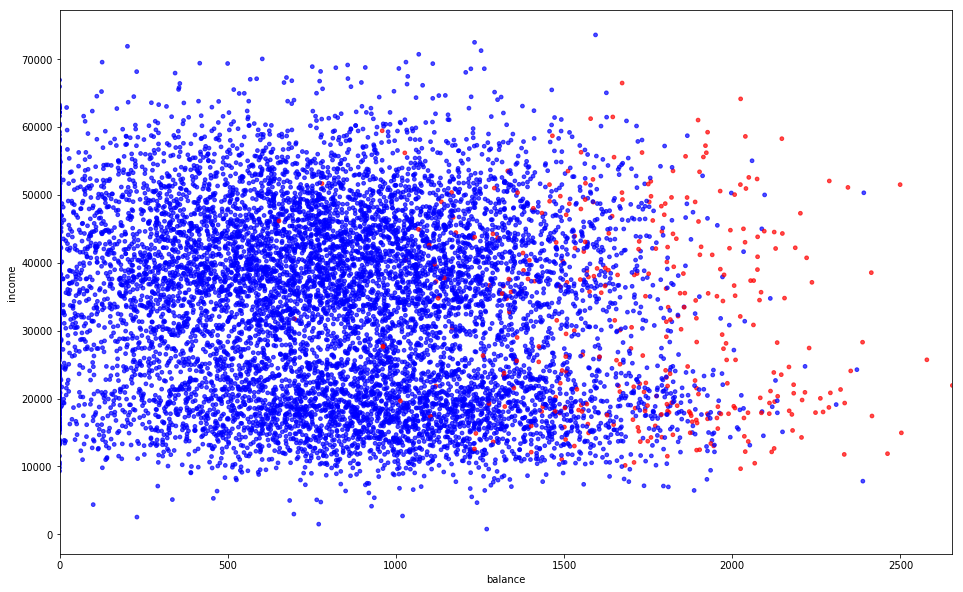

In [111]:
#Boxplots of all varaibles 
plt.figure(figsize=(20, 15))

#Income Boxplot vs default
ax = plt.subplot(3,2,1)
ax.boxplot([df.income[df.default == 'Yes'], df.income[df.default == 'No']])
ax.set_ylim((df.income.min(), df.income.max()))
ax.set_xticklabels(('Yes', 'No'))
ax.set_ylabel('income')
ax.set_xlabel('default')

#Income Boxplot vs student
ax1 = plt.subplot(3,2,2)
ax1.boxplot([df.income[df.student == 'Yes'], df.income[df.student == 'No']])
ax1.set_ylim((df.income.min(), df.income.max()))
ax1.set_xticklabels(('Yes', 'No'))
ax1.set_ylabel('income')
ax1.set_xlabel('student')

#Balance Boxplot vs default
ax2 = plt.subplot(3,2,3)
ax2.boxplot([df.balance[df.default == 'Yes'], df.balance[df.default == 'No']], vert = 0)
ax2.set_xlim((df.balance.min(), df.balance.max()))
ax2.set_yticklabels(('Yes', 'No'))
ax2.set_xlabel('balance')
ax2.set_ylabel('default')
plt.tight_layout()

#Balance Boxplot vs student
ax3 = plt.subplot(3,2,4)
ax3.boxplot([df.balance[df.student == 'Yes'], df.balance[df.student == 'No']], vert = 0)#
ax3.set_xlim((df.balance.min(), df.balance.max()))
ax3.set_yticklabels(('Yes', 'No'))
ax3.set_xlabel('balance')
ax3.set_ylabel('studemt')
plt.tight_layout()

#Boxplot comparing all variables 
ax4 = plt.subplot(3,2,5)
df_mod.boxplot()

#Scatterplot of balance vs. income

plt.figure(figsize=(16, 10))
color = ListedColormap(['r','b'])
plt.scatter(df.balance, df.income, s = 14, c=(df.default == 'No'), cmap = color, alpha = .7)
plt.xlim((df.balance.min(), df.balance.max()))
plt.xlabel('balance')
plt.ylabel('income')

plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Coefficients of Decision Boundary are 0.005413 and 0.000018


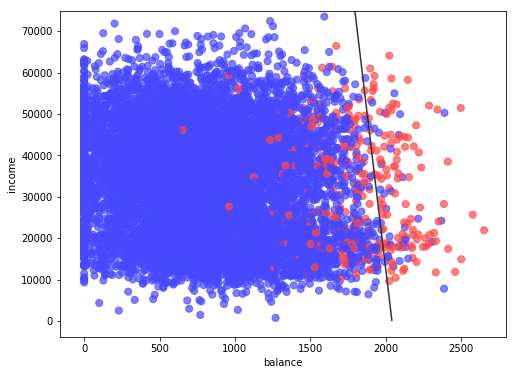

In [112]:
X=df_final[['balance','income']]
y=df_final['default']
X = np.array(X.values)
y = np.array(y.values)

clf = LogisticRegression(penalty='l1')
clf.fit(X, y)
print (('Coefficients of Decision Boundary are %f and %f') % (clf.coef_[0][0],clf.coef_[0][1]))

#xx = array with elements 0:2799 interval=1, yy = array with elemetns 0:74999 interval = 10
xx, yy = np.mgrid[0:2800:1, 0:75000:10]
# Translates slice objects to concatenation along the second axis.into (0,0),(0,10)....(2799,74980),(2799,74990)
grid = np.c_[xx.ravel(), yy.ravel()]
#take second column of grid, shape it as xx.shape (2800L,7500L)
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize = (8, 6))
ax.contour(xx, yy, probs, levels = [.5], cmap = "Greys", vmin = 0, vmax = .6)

ax.scatter(X[100:,0], X[100:, 1], c = y[100:], s = 50,
           cmap = "bwr", vmin = -.2, vmax = 1.2, 
           linewidth = 1,alpha = 0.7)

ax.set(xlabel="balance", ylabel="income")
plt.show()

Area under the ROC curve : 0.609735
Area under the ROC curve : 0.609706
Area under the ROC curve : 0.609978
Area under the ROC curve : 0.609892
Area under the ROC curve : 0.610078
Area under the ROC curve : 0.610207
Area under the ROC curve : 0.610078
Area under the ROC curve : 0.610279
Area under the ROC curve : 0.610236
Area under the ROC curve : 0.610222
Area under the ROC curve : 0.617153
Area under the ROC curve : 0.682280
Area under the ROC curve : 0.746978
Area under the ROC curve : 0.809700
Area under the ROC curve : 0.860021
Area under the ROC curve : 0.895793
Area under the ROC curve : 0.919893
Area under the ROC curve : 0.931392
Area under the ROC curve : 0.943235
Area under the ROC curve : 0.949393
Area under the ROC curve : 0.953001
Area under the ROC curve : 0.954691
Area under the ROC curve : 0.957054
Area under the ROC curve : 0.958486
Area under the ROC curve : 0.958615
Area under the ROC curve : 0.959460
Area under the ROC curve : 0.959947
Area under the ROC curve : 0

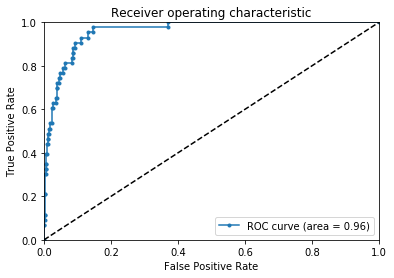

In [113]:
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Create linear regression object
alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)
plt.plot(alphas,scores)


# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.609806
Area under the ROC curve : 0.609749
Area under the ROC curve : 0.609835
Area under the ROC curve : 0.609907
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.610064
Area under the ROC curve : 0.610265
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.639377
Area under the ROC curve : 0.673201
Area under the ROC curve : 0.704190
Area under the ROC curve : 0.745103
Area under the ROC curve : 0.806378
Area under the ROC curve : 0.854522
Area under the ROC curve : 0.887315
Area under the ROC curve : 0.911545
Area under the ROC curve : 0.933011
Area under the ROC curve : 0.940643
Area under the ROC curve : 0.949593
Area under the ROC curve : 0.954419
Area under the ROC curve : 0.957040
Area under the ROC curve : 0.958887
Area under the ROC curve : 0.960119
Area under the ROC curve : 0.960878
Area under the ROC curve : 0.961364
Area under the ROC curve : 0.961823
Area under the ROC curve : 0

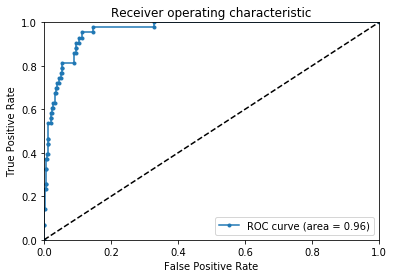

In [114]:
#ROC
# X are features and y is predictive variable - cancelled HD or not.
X = df_final[['balance', 'income', 'student']]

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state = random_state)
    n_samples, n_features = X.shape #(,3)
    half = int(n_samples/1.2)#take integer of the number, 1/6 test set, 5/6 train set
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Create linear regression object
alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)
plt.plot(alphas,scores)

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

 It is an excellent test because the area = 0.96 and the AUC ROC number increases from 0.960648 to 0.962310.

       coef     type
0  0.000408  student
1 -0.000126  balance
2 -0.000003   income
Adding the student variable makes little difference on ROC but big difference on the coefficients. Therefore, the student variable should be considered.


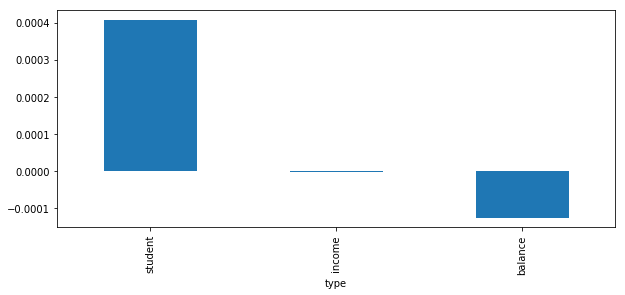

In [115]:
#coefficient, alpha = 0.1
regr = LogisticRegression(C = alpha,penalty= 'l2')
df_data = df_final.drop(['default'],1)

# Train the model using the training sets
regr.fit(X, y)
dfCoeffs = pd.DataFrame({'type':df_data.columns.values, 'coef':regr.coef_[0]})
df_reduced = dfCoeffs[(dfCoeffs['coef'] > 0)|(dfCoeffs['coef'] < 0)]

plt.figure(figsize=(10,4))
dfCoeffs2 = df_reduced.groupby('type')['coef'].mean()
dfCoeffs2[::-1].plot(kind='bar')
print (dfCoeffs)
print ('Adding the student variable makes little difference on ROC but big difference on the coefficients. Therefore, the student variable should be considered.')

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

Area under the ROC curve : 0.959718


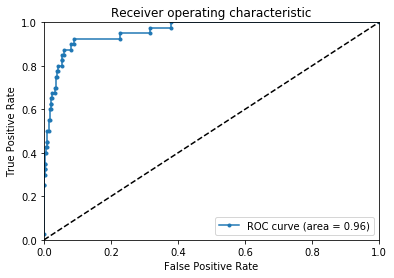

Area under the ROC curve : 0.972182


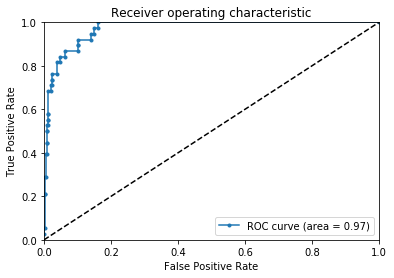

Area under the ROC curve : 0.947615


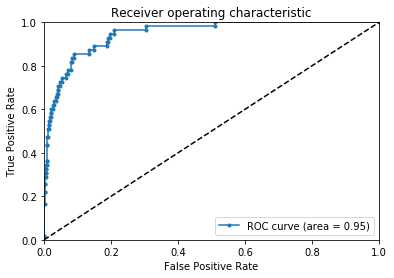

Area under the ROC curve : 0.954274


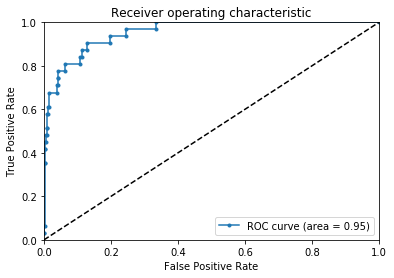

Area under the ROC curve : 0.957369


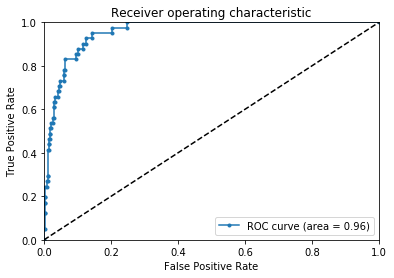

In [116]:
X = df_final[['balance', 'income', 'student']]
y = df_final['default']

random_state = [10,20,40,80,160]
for s in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=s)
    fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,LogisticRegression,C=100, penalty='l1')
    generate_ROCplot(fpr,tpr,'LR',roc_auc)

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

Somehow I couldn't load pydotplus and graphviz to plot the graph, I provide my code here though.'

In [117]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
import pydotplus
from __future__ import print_function
from PIL import Image, ImageFilter
import graphviz
import os
import subprocess
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

ImportError: No module named pydotplus

In [118]:
X=df_final[['balance','income','student']]
y=df_final['default']
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.
    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [120]:
dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr, feature_names=['x'])
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

8) Find the optimal decision tree depth and compute the AUC ROC. 

The optimal decision tree length is 3.000000


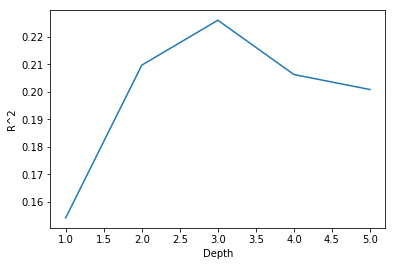

In [121]:
X = df_final[['balance','income']]
y = df_final['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors = []
test_errors = []
scores = []
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors = scores
n_opt = depths[np.argmax(scores)]
print (('The optimal decision tree length is %f')% (n_opt))

Area under the ROC curve : 0.945800


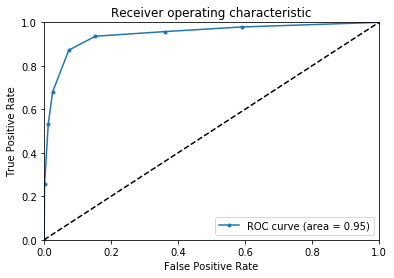

In [122]:
depths = np.arange(1,4)

for depth in depths:
    regr_opt = DecisionTreeRegressor(max_depth=n_opt)
    # Train the model using the training sets
    regr_opt.fit(X, y)
    scores.append(regr.score(X_test,y_test))
best_depth=depths[np.argmax(scores)]
fpr,tpr,roc_auc, thresholds = generate_auc(X_train, y_train, DecisionTreeClassifier, criterion = 'entropy', max_depth = best_depth)
generate_ROCplot(fpr,tpr,'LR',roc_auc)